In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Building the model
model = Sequential()
# Flattening the 28x28 images into 784 element vectors, it's the input layer
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=20, verbose=1)

Epoch 1/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8732 - loss: 0.4425 - val_accuracy: 0.9532 - val_loss: 0.1617
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9614 - loss: 0.1279 - val_accuracy: 0.9637 - val_loss: 0.1210
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9758 - loss: 0.0793 - val_accuracy: 0.9695 - val_loss: 0.1024
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9830 - loss: 0.0563 - val_accuracy: 0.9729 - val_loss: 0.0907
Epoch 5/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9867 - loss: 0.0433 - val_accuracy: 0.9744 - val_loss: 0.0913
Epoch 6/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9899 - loss: 0.0333 - val_accuracy: 0.9756 - val_loss: 0.0918
Epoch 7/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9745 - val_loss: 0.0934
Epoch 8/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9947 - loss: 0.0195 - 

In [9]:
# Training loss and accuracy
training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f'Training accuracy: {training_accuracy*100:.2f}%')
print(f'Training loss: {training_loss:.4f}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0076
Training accuracy: 99.38%
Training loss: 0.0294


In [10]:
# Test set accuracy and loss
# Evaluating the model using model.evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_accuracy*100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1397
Test accuracy: 97.53%
Test loss: 0.1217


In [11]:
# Evaluating the model using accuracy_score
from sklearn.metrics import accuracy_score
# Probabilities for each class
y_pred = model.predict(X_test)
# Which class has the highest probability
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f' Test accuracy: {accuracy*100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Test accuracy: 97.53%


In [12]:
# Predicting on test data
print(f'Predicted classes: {y_pred[:1]}') # Probabilities for each class (0-9) for the first test sample.
print(f'Predicted class labels: {y_pred_classes[:1]}') # Predicted class label for the first test sample on the basis of highest probability.

Predicted classes: [[3.4467451e-13 6.1802557e-16 5.1770765e-10 1.4258474e-06 2.4983361e-23
  1.2209216e-16 2.8000351e-21 9.9999857e-01 3.1475456e-10 1.0779582e-10]]
Predicted class labels: [7]


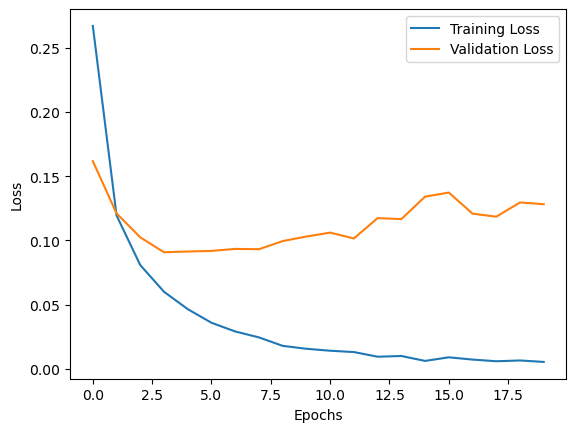

In [13]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

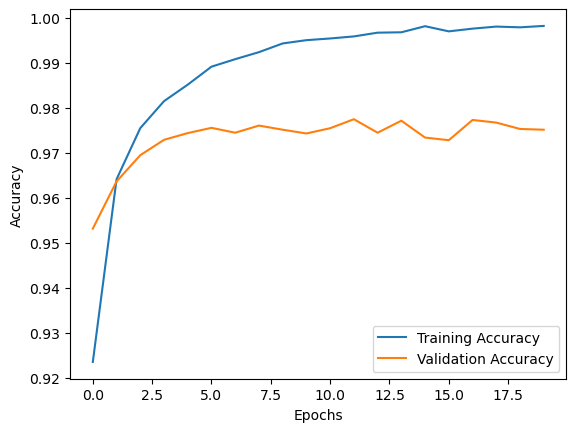

In [14]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([7], dtype=int64)

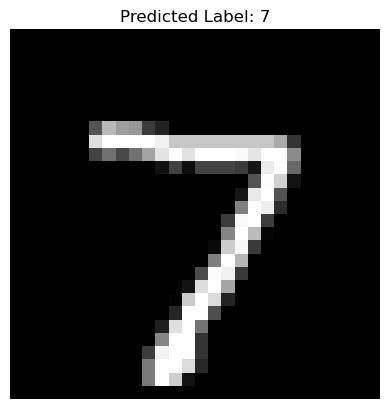

In [15]:
# Predicting on test data
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Predicted Label: {y_pred_classes[0]}')
plt.axis('off')
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([9], dtype=int64)

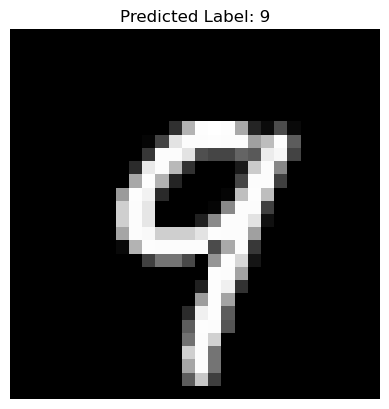

In [16]:
plt.imshow(X_test[12], cmap='gray')
plt.title(f'Predicted Label: {y_pred_classes[12]}')
plt.axis('off')
model.predict(X_test[12].reshape(1, 28, 28)).argmax(axis=1)